In [ ]:
!pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 30.1 MB/s eta 0:00:00


In [ ]:
import rasterio as rio;
import numpy as np;
import matplotlib.pyplot as plt;
import matplotlib
from rasterio.plot import show

In [ ]:

from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


<class 'rasterio.io.DatasetReader'>


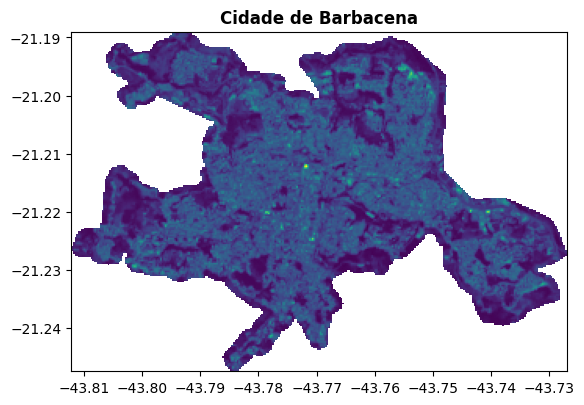

<Axes: title={'center': 'Cidade de Barbacena'}>

In [ ]:
#objeto do tipo rasterio.io.DatasetReader
image = rio.open("/content/gdrive/MyDrive/dados_redes_neurais_imagens/test/test/barbacena_landsat8_0.tif"); 
print(type(image))
show(image, title = "Cidade de Barbacena")

In [ ]:
#metadados, sistema de cordenadas e geo transform
image.transform
#print("Sistema de coordenadas: ", image.crs, "\n");
#print("Tranform Image: ", image.transform, "\n");

##AS TRÊS BANDAS SAO VERDE, VERMELHO E AZUL (B4, B3, B2)

Affine(0.00026949458523585647, 0.0, -43.81227371096366,
       0.0, -0.00026949458523585647, -21.189011764169216)

<class 'numpy.ndarray'>


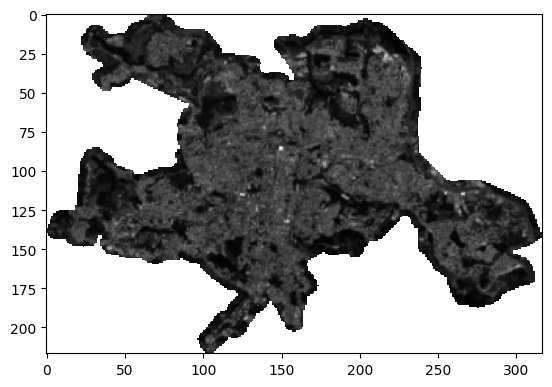

In [ ]:
#objeto do tipo numpy.ndarray
np_image = image.read().astype('f4'); #LÊ E CONVERTE PARA FLOAT
print(type(np_image));
plt.imshow(np_image[0,:,:], cmap = 'gray')

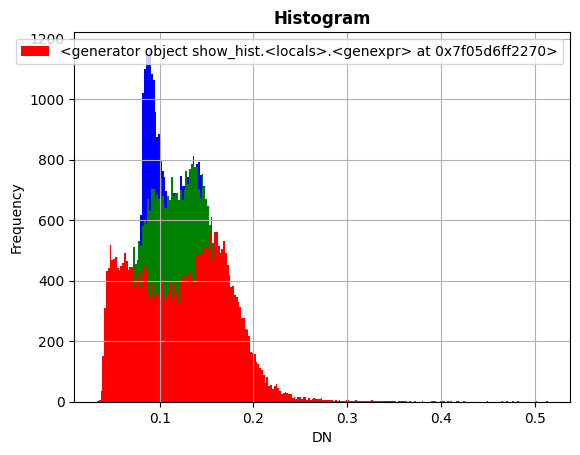

In [ ]:
rio.plot.show_hist(np_image, bins=250, histtype='stepfilled', lw=0.0, stacked=False, alpha=1)
#for histtype; supported values are 'bar', 'barstacked', 'step', 'stepfilled'

In [ ]:
#RETIRANDO OS NaNs


Shape do Array: (3, 217, 317)
[[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]]


<ipython-input-134-4aa6971448e4>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("Greys_r").copy()


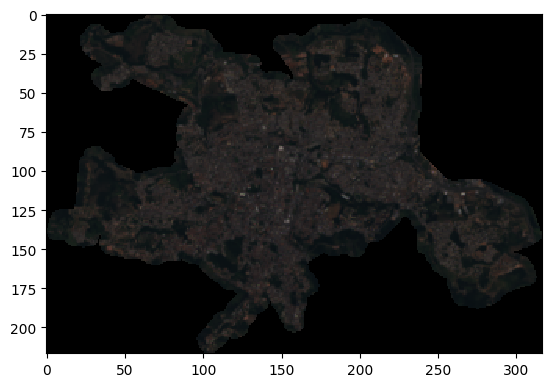

In [ ]:
#array shape: (3, 217, 317)
#3 RGB bands and (217, 317) pixels each image
np_image = np.nan_to_num(np_image, nan=np.nan)
np_image = np_image#.transpose(1, 2, 0)

print(f"Shape do Array: {np_image.shape}")
print(np_image)

np_novo = np.ma.array (np_image, mask=np.isnan(np_image))
cmap = plt.cm.get_cmap("Greys_r").copy()
# Choose the color
cmap.set_bad('white',1)


plt.imshow(np_novo.transpose(1, 2, 0), interpolation='nearest', cmap=cmap)
plt.show()

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


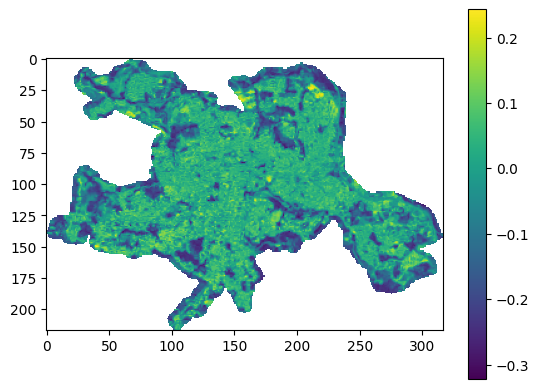

In [ ]:
#CALCULANDO INDICE NORMALIZADO B4 (green) E B3 (red) (eu não peguei a banda do nir)
#A IDEIA INICIAL ERA CALCULAR O NDVI
ndgr = np.divide(np.subtract(np_image[0], np_image[1]), np.add(np_image[0], np_image[1]));
#ndgr = np.nan_to_num(ndgr, nan = );
plt.imshow(ndgr, cmap='viridis');
plt.colorbar();

print(ndgr)

In [ ]:
print(ndgr.min());

nan


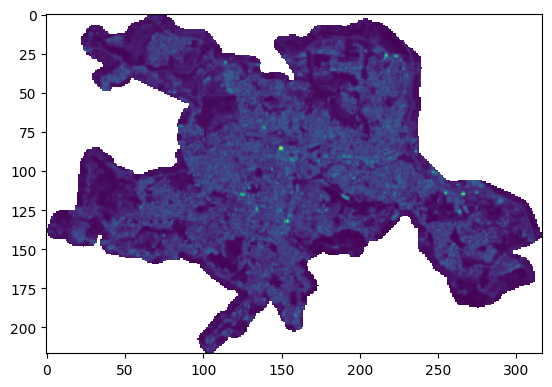

In [ ]:
#ACHO Q A IMAGEM ESTÁ ESCURA PORQ OS CANAIS ESTÃO INVERTIDOS GREEN-RED-BLUE
#ENTÃO DESCOBRI ESSA FUNÇÃO PARA PERMUTAR GRB PARA RGB
image_nova = np.concatenate((np_image[-1: ,:, ]), axis=1)
image_nova
plt.imshow(image_nova);
#image_nova = np.concatenate(image_nova, np_image[0], axis =1)
#numpy.moveaxis(ndgr, , destination)


In [ ]:
import torch 

In [ ]:
print(type(image_nova))

In [ ]:
meu_tensor = torch.from_numpy(image_nova)
meu_tensor